## Observations and Insights 

In [257]:
# Dependencies and Setup
%matplotlib inline 
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
merged_df["Mouse ID"].head(66)
# Display the data table for preview


0     k403
1     k403
2     k403
3     k403
4     k403
      ... 
61    f966
62    f966
63    f966
64    f966
65    m546
Name: Mouse ID, Length: 66, dtype: object

In [258]:
merged_df = merged_df.dropna(how='any')

merged_df["Sex"].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

In [259]:
# duplicateDFRow = merged_df[["Mouse ID","Timepoint" ]].duplicated()
# Extract duplicate rows from the original
print(f" We have a total of {merged_df.duplicated().sum()} duplicates")
print(merged_df.duplicated().value_counts())
duplicates = merged_df[merged_df.duplicated()]

# Optional: Get all the data for the duplicate mouse ID.
print(f" \n The duplicate is\n {duplicates}")


 We have a total of 1 duplicates
False    1892
True        1
dtype: int64
 
 The duplicate is
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [295]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# merged_df[merged_df["Mouse ID"] == "g989"]   # merged_df.iloc[909]
cleaned_df = merged_df.drop_duplicates()
len(cleaned_df)

# Can check for 909 in cleaned_df[cleaned_df["Mouse ID"] == "g989"]----gone!
# cleaned_df.iloc[cleaned_df["Mouse ID"]=="g989"]





1892

In [261]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [262]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Combining results of multiple groupby functions into a new DataFrame.
# merged_df.groupby('Mouse ID')['Drug Regimen'].nunique().plot(kind='bar')
# print(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].describe())
# SE = merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
# print(f"Standard Error: \n  {SE}")
# SE.columns['regimen', 'std error']

# stats = pd.DataFrame(...)


In [263]:
# SEM of tumor volume for each type of regimen-----# Using a single groupby with agg operator once.
stats_per_reg = cleaned_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg([ "mean", "median", "var", "std", "sem"])

stats_per_reg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [264]:
cleaned_df.groupby(['Drug Regimen']).nunique()


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,2,15,9,10,206,4
Ceftamin,25,2,15,6,10,154,5
Infubinol,25,2,15,7,10,154,5
Ketapril,25,2,15,6,10,164,5
Naftisol,25,2,14,6,10,162,5
Placebo,25,2,18,6,10,157,5
Propriva,25,2,14,6,10,136,5
Ramicane,25,2,15,9,10,204,4
Stelasyn,24,2,14,6,10,158,5


## Bar and Pie Charts

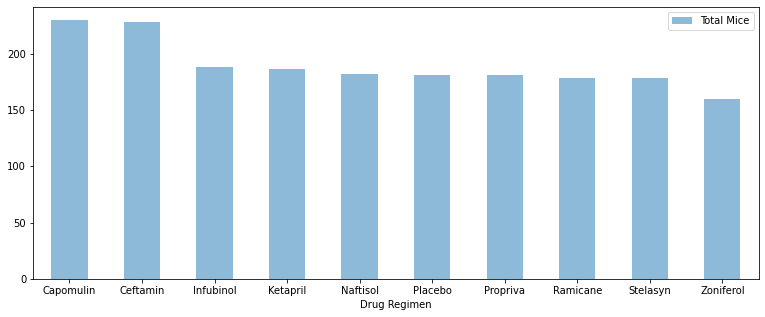

In [265]:
# total number of mice for each treatment
mice_per_regimen = cleaned_df["Drug Regimen"].value_counts()
df2  = mice_per_regimen.copy() 
# barplot = merged_df.plot.bar(x='Drug Regimen', y='total number of mice', rot=0)

# plt.bar(x_axis, cleaned_df["Drug Regimen"], color='r', alpha=0.5, align="center")
# mice_per_regimen.iloc[0:5]

# df2 = pd.DataFrame({"Total Mice":df2})
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', "Ketapril", 'Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
df = pd.DataFrame({'Drug Regimen':drugs, 'Total Mice':df2[0:]})
ax = df.plot.bar(x='Drug Regimen', y='Total Mice', rot=0, figsize=(13,5), alpha=0.5)

Text(24.0, 0.5, 'Total Mice')

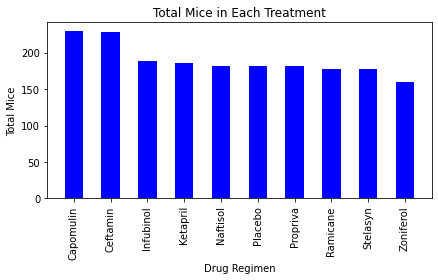

In [266]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(df2[0:]))
plt.bar(x_axis, df2[0:] , width = 0.5, color="b", align="center")
plt.title("Total Mice in Each Treatment")
plt.xlabel("Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.ylabel("Total Mice")





([<matplotlib.patches.Wedge at 0x17f6594bc70>,
 [Text(-0.022912761842134293, 1.149771718796721, 'male'),
  Text(0.02191645183653077, -1.0997816461183998, 'female')])

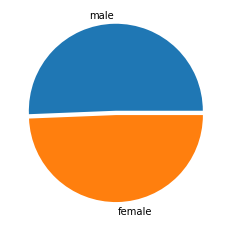

In [267]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_groups = cleaned_df.groupby('Sex').count()
gender_groups

# fig = plt.figure(figsize =(10, 7))
# plt.pie(gender_groups,explode=explode, labels = ['male','female'])

female = cleaned_df[(cleaned_df["Sex"]=="Female")]
male = cleaned_df[(cleaned_df["Sex"]=="Male")]

len(male)
len(female)

count_sex= [len(male), len(female)]
myexplode = [0.05, 0]

plt.pie(count_sex, labels = ['male','female'], explode = myexplode)


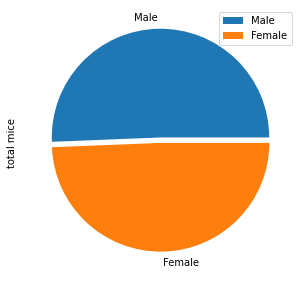

In [268]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df = pd.DataFrame({'total mice': [len(male),len(female)]}, index=['Male', 'Female'])
plot = df.plot.pie(y='total mice', figsize=(5, 5), explode = myexplode)


## Quartiles, Outliers and Boxplots

In [269]:
# Calculate the final tumor volume of EACH MOUSE across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin.
# Start by getting the last (greatest) timepoint for each mouse. ["Timepoint"] =="45" 
# create a dataframe of mouse at timepoint 45

time_45 = cleaned_df[(cleaned_df['Timepoint'] == 45)]
cleaned_df = pd.merge(time_45,cleaned_df, on="Timepoint", how = "inner")

Ceftamin = cleaned_df[(cleaned_df["Drug Regimen_x"] == "Ceftamin")]
Ceftamin.head(44)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# using inner merge to only include timepoint 45
Ram = time_45[(time_45["Drug Regimen"]=="Ramicane")]
Inf = time_45[(time_45["Drug Regimen"]=="Infubinol")]
Cap = time_45[(time_45["Drug Regimen"]=="Capomulin")]
Cef = time_45[(time_45["Drug Regimen"]=="Ceftamin")]

Ram

vertical_stack = pd.concat([Ram, Inf, Cap, Cef], axis=0)

# Four_treatments = pd.DataFrame(Ram, Inf, Cap, Cef)
# Four_treatments
vertical_stack

# vertical_simple = vertical_stack.columns.drop(['Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])
vertical_simple = vertical_stack.loc[:, vertical_stack.columns.drop(['Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]

each_mouse = vertical_simple.groupby("Mouse ID")
each_mouse.head()



,Mouse ID,Drug Regimen,Sex,Tumor Volume (mm3)
9,k403,Ramicane,Male,22.050126
49,g791,Ramicane,Male,29.128472
59,s508,Ramicane,Male,30.276232
74,m546,Ramicane,Male,30.564625
84,z578,Ramicane,Male,30.638696
...,...,...,...,...
1670,w151,Ceftamin,Male,67.527482
1773,x581,Ceftamin,Female,64.634949
1797,x822,Ceftamin,Male,61.386660
1845,y769,Ceftamin,Female,68.594745


In [270]:
#check the merged dataframe
merged2_df

,Mouse ID_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Mouse ID_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,k403,Ramicane,Male,21,16,22.050126,1
1,k403,Ramicane,Male,21,16,45,22.050126,1,s185,Capomulin,Female,3,17,23.343598,1
2,k403,Ramicane,Male,21,16,45,22.050126,1,x401,Capomulin,Female,16,15,28.484033,0
3,k403,Ramicane,Male,21,16,45,22.050126,1,m601,Capomulin,Male,22,17,28.430964,1
4,k403,Ramicane,Male,21,16,45,22.050126,1,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16895,z969,Naftisol,Male,9,30,45,73.867845,4,y769,Ceftamin,Female,6,27,68.594745,4
16896,z969,Naftisol,Male,9,30,45,73.867845,4,y865,Ceftamin,Male,23,26,64.729837,3
16897,z969,Naftisol,Male,9,30,45,73.867845,4,z581,Infubinol,Female,24,25,62.754451,3
16898,z969,Naftisol,Male,9,30,45,73.867845,4,z795,Naftisol,Female,13,29,65.741070,3


In [271]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
by_regi = vertical_simple.groupby("Drug Regimen")

# show_rami = by_regi[(by_regi["Drug Regimen"]=="Ramicane")]

stats = by_regi.describe()
stats

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                  21.0  36.236114  5.608969  23.343598  32.377357   
Ceftamin                   13.0  64.132421  3.253497  59.741901  61.433892   
Infubinol                   9.0  65.755562  3.433282  60.918767  62.754451   
Ramicane                   20.0  34.955595  5.486439  22.050126  30.981175   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     37.311846  40.159220  47.685963  
Ceftamin      64.299830  67.527482  68.923185  
Infubinol     66.083066  67.685569  72.226731  
Ramicane      34.848627  38.508305  45.220869

In [279]:
# stats['IQR'] = stats['75%'] - stats['25%']
# from scipy import stats
# IQR = stats.iqr(by_regi, interpolation = 'midpoint')
quartile = by_regi.quantile([.25,.75])
iqr_cap = quartile['Tumor Volume (mm3)'][1]- quartile['Tumor Volume (mm3)'][0]
iqr_cef = quartile['Tumor Volume (mm3)'][3]- quartile['Tumor Volume (mm3)'][2]
iqr_inf = quartile['Tumor Volume (mm3)'][5]- quartile['Tumor Volume (mm3)'][4]
iqr_ram = quartile['Tumor Volume (mm3)'][7]- quartile['Tumor Volume (mm3)'][6]
inter_range = pd.DataFrame({"Capomulin":iqr_cap,"Ceftamin":iqr_cef,
"Infubinol": iqr_inf, "Ramicane": iqr_ram}, index = ["Interquartile Range"])

inter_range

C:\Users\mr-ma\AppData\Local\Temp\ipykernel_12508\4040225661.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  quartile = by_regi.quantile([.25,.75])


,Capomulin,Ceftamin,Infubinol,Ramicane
Interquartile Range,7.781863,6.09359,4.931117,7.52713


In [273]:
# quantitatively determine if there are any potential outliers across all four treatment regimens.
#take data and check if data +iqr is outside the 25% and 75% percentile???
#by insection ---need a way to program check the values are such than 25%<tumour vol <75%
quartile, Cap

(                   Tumor Volume (mm3)
 Drug Regimen                         
 Capomulin    0.25           32.377357
              0.75           40.159220
 Ceftamin     0.25           61.433892
              0.75           67.527482
 Infubinol    0.25           62.754451
              0.75           67.685569
 Ramicane     0.25           30.981175
              0.75           38.508305,
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 19      s185    Capomulin  Female           3          17         45   
 29      x401    Capomulin  Female          16          15         45   
 39      m601    Capomulin    Male          22          17         45   
 104     u364    Capomulin    Male          18          17         45   
 124     y793    Capomulin    Male          17          17         45   
 134     r554    Capomulin  Female           8          17         45   
 144     m957    Capomulin  Female           3          19         45   
 164     t565    Capomuli

In [274]:
Cap_tumour = Cap.loc[: , Cap.columns.drop(['Mouse ID','Sex', 'Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]
Cap_tumour['Tumor Volume (mm3)']
Inf_tumour = Inf.loc[: , Inf.columns.drop(['Mouse ID','Sex', 'Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]
Inf_tumour

Cefta_tumour =Cef.loc[: , Cef.columns.drop(['Mouse ID','Sex', 'Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]
Rami_tumour = Ram.loc[: , Ram.columns.drop(['Mouse ID','Sex', 'Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]
Inf
# example = vertical_stack.loc[:, vertical_stack.columns.drop(['Mouse ID','Sex','Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,Infubinol,Male,23,26,45,60.918767,1
1053,k483,Infubinol,Female,20,30,45,66.196912,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3


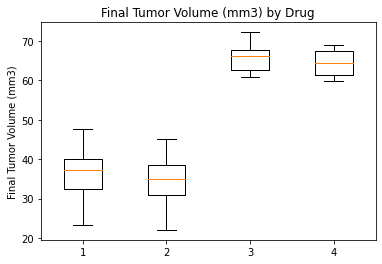

In [280]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# quartile.loc["Capomulin"]


# four_reg = vertical_simple.groupby("Drug Regimen")  
# four_reg.head()
data =[Cap_tumour['Tumor Volume (mm3)'],Rami_tumour['Tumor Volume (mm3)'],Inf_tumour['Tumor Volume (mm3)'],Cefta_tumour['Tumor Volume (mm3)']]
# example list tumors_Cap = []
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3) by Drug')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data)

# fig2, ax2 = plt.subplots()
# ax2.set_title('Final Tumor Volume (mm3)')
# ax2.boxplot(Inf_tumour["Tumor Volume (mm3)"])
plt.show()


## Line and Scatter Plots

In [276]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [277]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [278]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
